In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Carguemos los datos y grafiquemos:

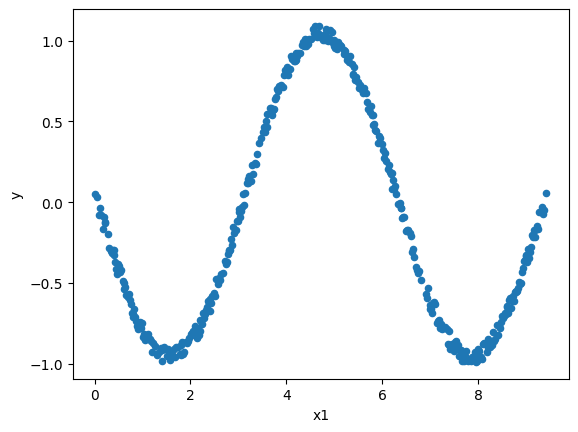

In [2]:
datos = pd.read_csv('datos.csv')
datos.plot.scatter(x='x1',y='y')
plt.show()

Agreguemos una entrada nueva:

In [3]:
datos['x2']=np.sin(datos['x1'])
datos

,x1,y,x2
0,1.303226,-0.944786,0.964416
1,0.547733,-0.421419,0.520753
2,8.895933,-0.501841,0.504537
3,6.497242,-0.180428,0.212425
4,1.019916,-0.837501,0.852064
...,...,...,...
395,9.179243,-0.174698,0.243076
396,1.775409,-0.940481,0.979140
397,4.041889,0.785913,-0.783511
398,0.717719,-0.570122,0.657668


De aqui en adelante, lo de siempre:

In [4]:
xTrain,xTest,yTrain,yTest = train_test_split(
    datos[['x1','x2']],
    datos['y'],
    train_size=0.7,
    random_state=150)

In [5]:
modelo = LinearRegression()
modelo.fit(xTrain, yTrain)
modelo.coef_,modelo.intercept_

(array([-8.59796398e-04, -9.97030198e-01]), np.float64(0.052328414914355054))

In [6]:
print(modelo.score(xTrain, yTrain))
print(modelo.score(xTest, yTest))

0.9982392545716678
0.9977890171823325


In [7]:
mean_absolute_error(yTest, modelo.predict(xTest))

0.02716854802371418

In [8]:
x=0
modelo.predict([[x,np.sin(x)]])

c:\Users\susan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.05232841])

Por último, visualicemos las entradas de prueba evaluadas en el modelo respecto al dataset de entrenamiento:

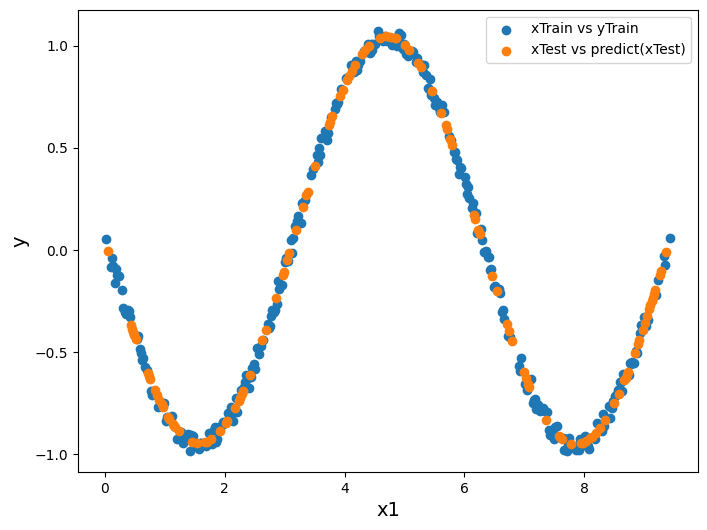

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(xTrain['x1'],yTrain,label='xTrain vs yTrain')
plt.scatter(xTest['x1'], modelo.predict(xTest),label='xTest vs predict(xTest)')
plt.legend()
plt.xlabel('x1',size=14)
plt.ylabel('y',size=14)
plt.show()